In [0]:
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_df= pd.read_csv("/content/drive/My Drive/train.csv")
test_df= pd.read_csv("/content/drive/My Drive/test_bqCt9Pv.csv")

In [0]:
print(train_df.shape)
print(test_df.shape)

(233154, 41)
(112392, 40)


In [0]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [0]:
test_df.head()


In [0]:
train_df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [0]:
test_df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
count,112392.000000,112392.000000,1.123920e+05,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,...,112392.000000,112392.000000,1.123920e+05,1.123920e+05,1.123920e+05,1.123920e+05,1.123920e+05,112392.000000,112392.000000,112392.000000
mean,711741.891861,56076.803269,7.718639e+04,75.310325,78.902591,19843.303545,68.366031,3014.001352,7.215754,1771.651541,...,0.012350,0.003176,2.776081e+03,3.721477e+03,3.671156e+03,1.123698e+04,1.679060e+02,0.314907,0.091884,0.226119
std,33492.215991,13123.697627,1.827149e+04,11.006380,71.469633,3555.303301,22.137265,2223.215364,4.679847,1104.533635,...,0.198374,0.073784,1.406059e+05,2.015516e+05,2.013686e+05,2.741250e+05,1.763841e+04,0.843406,0.381809,0.739231
min,654115.000000,11613.000000,4.011700e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,-3.882000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,682658.750000,48849.000000,6.751000e+04,69.970000,15.000000,16633.000000,45.000000,1312.000000,4.000000,801.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,711522.500000,55359.000000,7.258400e+04,77.780000,67.000000,20675.000000,86.000000,2412.000000,6.000000,1664.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,740851.250000,62147.000000,8.004000e+04,83.740000,136.000000,23170.000000,86.000000,5092.000000,10.000000,2694.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.855000e+03,0.000000e+00,0.000000,0.000000,0.000000
max,769909.000000,940690.000000,1.271553e+06,95.000000,261.000000,24901.000000,155.000000,7345.000000,22.000000,3923.000000,...,20.000000,8.000000,3.579410e+07,5.794500e+07,5.794500e+07,8.526233e+07,5.390000e+06,22.000000,18.000000,23.000000


In [0]:
 train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [0]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
UniqueID                               112392 non-null int64
disbursed_amount                       112392 non-null int64
asset_cost                             112392 non-null int64
ltv                                    112392 non-null float64
branch_id                              112392 non-null int64
supplier_id                            112392 non-null int64
manufacturer_id                        112392 non-null int64
Current_pincode_ID                     112392 non-null int64
Date.of.Birth                          112392 non-null object
Employment.Type                        108949 non-null object
DisbursalDate                          112392 non-null object
State_ID                               112392 non-null int64
Employee_code_ID                       112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
Aadhar_flag                   

In [0]:
train_df.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [0]:
#check if any null data is there

train_df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [0]:
train_df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [0]:
#we can see there is missing data in employment type columns. We can remove the entire missing data and can proceed with the remaining data.
#though this type of data can't be missing in loan application, we can consider it as the unemployed category of data.
# changing this to type "unemployed in both train and test"

train_df['Employment.Type'].fillna('unemployed',inplace=True)
test_df['Employment.Type'].fillna('unemployed',inplace=True)

In [0]:
train_df.isnull().sum().sum()


0

In [0]:
test_df.isnull().sum().sum()

0

In [0]:
#store unique id and default prediction separately
u_id = test_df['UniqueID']
y_train= train_df.iloc[:,-1]
#print(y_train)

In [0]:
#now join the train and test data to further analyse the data
#but first drop the last column of test data 
new_train_df= train_df.drop(['loan_default'],axis=1)

total_data= pd.concat([new_train_df,test_df], axis =0)
#total_data.tail(10)
total_data.shape


(345546, 40)

In [0]:
#perform encoding for employment type


total_data['Employment.Type'].value_counts()

total_data['Employment.Type']=total_data['Employment.Type'].replace(('unemployed','Self employed','Salaried'),(0,1,2))

total_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,2,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,1,...,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,1,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,1,...,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,1,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1


In [0]:
#let's check the Bureau score description

total_data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                174843
C-Very Low Risk                                             23870
A-Very Low Risk                                             21683
D-Very Low Risk                                             16472
B-Very Low Risk                                             13696
M-Very High Risk                                            12808
F-Low Risk                                                  12176
K-High Risk                                                 12141
H-Medium Risk                                               10142
E-Low Risk                                                   8393
I-Medium Risk                                                8260
G-Low Risk                                                   5795
J-High Risk                                                  5526
Not Scored: Sufficient History Not Available                 5025
Not Scored: Not Enough Info available on the customer        4940
Not Scored

In [0]:
#it's better to encode these scores, so that our model can perform better
#we can manually encode data with no history/not scored as 0 and increment by 1 for rest of the risks


total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 2)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 3)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 4)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 5)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 6)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 7)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 8)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 9)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 10)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 11)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 12)
total_data['PERFORM_CNS.SCORE.DESCRIPTION'] = total_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 13)

In [0]:
#columns 

print(total_data.columns)



Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')


In [0]:
total_data['DisbursalDate'] = pd.to_datetime(total_data['DisbursalDate'], errors = 'coerce')
total_data['DisbursalMonth'] = total_data['DisbursalDate'].dt.month
total_data['DisbursalDate']=total_data['DisbursalMonth']


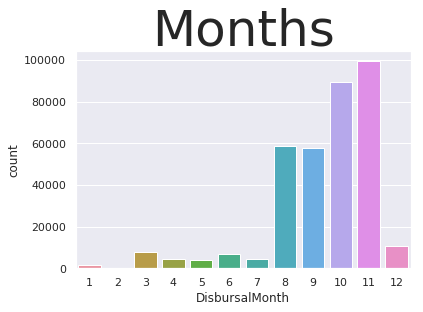

In [0]:
sns.set(style="darkgrid")
sns.countplot(total_data['DisbursalMonth'])
plt.title('Months', fontsize = 50)
plt.show()

In [0]:

#remove irrelevant columns from the final data

total_data= total_data.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Date.of.Birth','Employee_code_ID'],axis=1)


In [0]:
#convert columns that should be cataagorical data rather than integer

total_data['branch_id'] = total_data['branch_id'].astype('category')

total_data['manufacturer_id'] = total_data['manufacturer_id'].astype('category')

total_data['State_ID'] = total_data['State_ID'].astype('category')

In [0]:
print(total_data.columns)

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'manufacturer_id',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'DisbursalMonth'],
      dtype='object')


In [0]:
#Let's visulaize first 3 columns

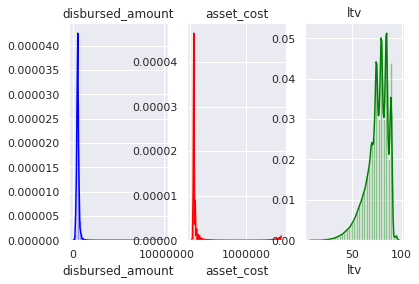

In [0]:
plt.subplot(1, 3, 1)
sns.distplot(total_data['disbursed_amount'],  color = 'blue')
plt.title('disbursed_amount')


plt.subplot(1, 3, 2)
sns.distplot(total_data['asset_cost'], color = 'red')
plt.title('asset_cost')

plt.subplot(1, 3, 3)
sns.distplot(total_data['ltv'], color = 'green')
plt.title('ltv')

plt.show()

In [0]:
#it's better to normalise these columns as the normal distributed data are convenient in analysing the model.
#Log-normal distribution

total_data['disbursed_amount'] = np.log1p(total_data['disbursed_amount'])

total_data['asset_cost'] = np.log1p(total_data['asset_cost'])

total_data['ltv'] = np.log1p(total_data['ltv'])



In [0]:
#similarly normalise PRIMARY.INSTAL.AMT , SEC.INSTAL.AMT columns

total_data['PRIMARY.INSTAL.AMT'] = np.log1p(total_data['PRIMARY.INSTAL.AMT'])
total_data['SEC.INSTAL.AMT'] = np.log1p(total_data['SEC.INSTAL.AMT'])


In [0]:
total_data.head()

,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,Employment.Type,DisbursalDate,State_ID,MobileNo_Avl_Flag,Aadhar_flag,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,DisbursalMonth
0,10.831292,10.975088,4.505902,67,45,2,3,6,1,1,...,0,0,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,0,3
1,10.761004,11.090584,4.307168,67,45,1,9,6,1,1,...,0,0,7.596894,0.0,0,1,1yrs 11mon,1yrs 11mon,0,9
2,10.883298,11.024530,4.506785,67,45,1,1,6,1,1,...,0,0,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,0,1
3,10.959784,11.099136,4.494015,67,45,1,10,6,1,1,...,0,0,3.465736,0.0,0,0,0yrs 8mon,1yrs 3mon,1,10
4,10.866261,11.007104,4.493009,67,45,1,9,6,1,1,...,0,0,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,1,9


In [0]:
#date-time data cleanings 
#as per famous conversion steps, transforming ddmmyy to yrs  
#performing on columns Average loan tenure


total_data['AVERAGE.ACCT.AGE'] = total_data['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
total_data['AVERAGE.ACCT.AGE'] = total_data['AVERAGE.ACCT.AGE'].apply(lambda x: x.split('yrs')[0])

#similarly for Time since first loan

total_data['CREDIT.HISTORY.LENGTH'] = total_data['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
total_data['CREDIT.HISTORY.LENGTH'] = total_data['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split('yrs')[0])

In [0]:
total_data.head()

,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,Employment.Type,DisbursalDate,State_ID,MobileNo_Avl_Flag,Aadhar_flag,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,DisbursalMonth
0,10.831292,10.975088,4.505902,67,45,2,3,6,1,1,...,0,0,0.000000,0.0,0,0,0,0,0,3
1,10.761004,11.090584,4.307168,67,45,1,9,6,1,1,...,0,0,7.596894,0.0,0,1,1,1,0,9
2,10.883298,11.024530,4.506785,67,45,1,1,6,1,1,...,0,0,0.000000,0.0,0,0,0,0,0,1
3,10.959784,11.099136,4.494015,67,45,1,10,6,1,1,...,0,0,3.465736,0.0,0,0,0,1,1,10
4,10.866261,11.007104,4.493009,67,45,1,9,6,1,1,...,0,0,0.000000,0.0,0,0,0,0,1,9


In [0]:
total_data.isnull().sum()

disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
manufacturer_id                        0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS                       0
SEC.OVERDUE.ACCT

In [0]:
total_data.isnull().sum()

disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
manufacturer_id                        0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS                       0
SEC.OVERDUE.ACCT

In [0]:
#let's fill the missing data with the mean values
total_data['SEC.CURRENT.BALANCE'].fillna(total_data['SEC.CURRENT.BALANCE'].mean(), inplace = True)
total_data['PRI.SANCTIONED.AMOUNT'].fillna(total_data['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)
total_data['PRI.CURRENT.BALANCE'].fillna(total_data['PRI.CURRENT.BALANCE'].mean(), inplace = True)

In [0]:
total_data.isnull().sum()


disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
manufacturer_id                        0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS                       0
SEC.OVERDUE.ACCT

In [0]:
from sklearn.preprocessing import LabelEncoder

lenco = LabelEncoder()
total_data['branch_id'] = lenco.fit_transform(total_data['branch_id'])
total_data['manufacturer_id'] = lenco.fit_transform(total_data['manufacturer_id'])
total_data['State_ID'] = lenco.fit_transform(total_data['State_ID'])


In [0]:
#final look at the preprocessed data
total_data.head(10)

,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,Employment.Type,DisbursalDate,State_ID,MobileNo_Avl_Flag,Aadhar_flag,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,DisbursalMonth
0,10.831292,10.975088,4.505902,30,0,2,3,5,1,1,...,0,0,0.000000,0.0,0,0,0,0,0,3
1,10.761004,11.090584,4.307168,30,0,1,9,5,1,1,...,0,0,7.596894,0.0,0,1,1,1,0,9
2,10.883298,11.024530,4.506785,30,0,1,1,5,1,1,...,0,0,0.000000,0.0,0,0,0,0,0,1
3,10.959784,11.099136,4.494015,30,0,1,10,5,1,1,...,0,0,3.465736,0.0,0,0,0,1,1,10
4,10.866261,11.007104,4.493009,30,0,1,9,5,1,1,...,0,0,0.000000,0.0,0,0,0,0,1,9
5,10.906213,11.033292,4.507116,30,0,1,9,5,1,1,...,0,0,7.206377,0.0,0,0,1,2,0,9
6,10.743977,11.026809,4.349245,30,0,2,9,5,1,1,...,0,0,0.000000,0.0,0,0,0,0,0,9
7,10.689556,11.033292,4.288951,30,0,2,9,5,1,1,...,0,0,0.000000,0.0,0,0,0,0,0,9
8,10.891429,11.034470,4.506013,30,0,1,5,5,1,1,...,0,0,0.000000,0.0,0,0,4,4,1,5
9,10.870547,11.023551,4.476768,30,0,2,9,5,1,0,...,0,0,7.866722,0.0,0,0,1,1,0,9


In [0]:
#training and test datasets back


x_train = total_data.iloc[:233154,:]
x_test = total_data.iloc[233154:,:]


In [0]:
y_train.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [0]:

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)



In [0]:
# checking the shapes
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(186523, 36)
(186523,)
(46631, 36)
(46631,)


In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

In [0]:

#let's check with Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0, n_estimators=100, criterion = 'entropy')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_val)

print("Training Accuracy: ", classifier.score(x_train, y_train))
print('Testing Accuarcy: ', classifier.score(x_val, y_val))



Training Accuracy:  0.9968100448738225
Testing Accuarcy:  0.7759859321052519


              precision    recall  f1-score   support

           0       0.79      0.97      0.87     36614
           1       0.37      0.06      0.10     10017

   micro avg       0.78      0.78      0.78     46631
   macro avg       0.58      0.52      0.49     46631
weighted avg       0.70      0.78      0.71     46631



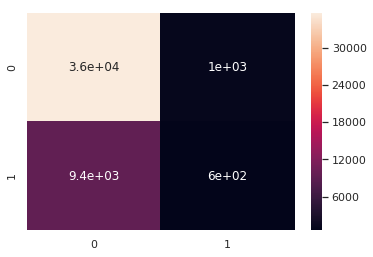

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cr = classification_report(y_val,  y_pred)
print(cr)

# confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot = True)

In [0]:
# avg precision score
from sklearn.metrics import average_precision_score

avg_prediction_rf = average_precision_score(y_val, y_pred)
print('Average Precision Score Random Forest:', avg_prediction_rf)

Average Precision Score Random Forest: 0.22405917839744116


In [0]:
y_pred_rf = classifier.predict(x_test)

In [0]:
submission = pd.DataFrame({'UniqueID': u_id,'loan_default': y_pred_rf})

In [0]:
filename = 'submission_rf.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission_rf.csv


Training Accuracy:  0.7827077625815583
Testing Accuarcy:  0.7853573802835024
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     36614
           1       0.59      0.00      0.01     10017

   micro avg       0.79      0.79      0.79     46631
   macro avg       0.69      0.50      0.44     46631
weighted avg       0.74      0.79      0.69     46631



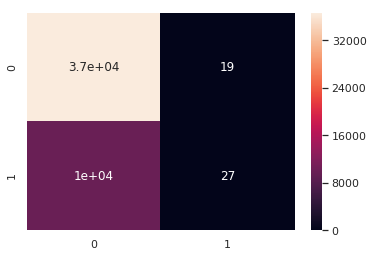

In [431]:
#XGBoost


from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

class_xgb = XGBClassifier()
class_xgb.fit(x_train, y_train)


y_pred = class_xgb.predict(x_val)

print("Training Accuracy: ", class_xgb.score(x_train, y_train))
print('Testing Accuarcy: ', class_xgb.score(x_val, y_val))

#classification report
cr = classification_report(y_val,  y_pred)
print(cr)

#confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot = True)

In [432]:
# avg precision score
from sklearn.metrics import average_precision_score

avg_prediction_xg = average_precision_score(y_val, y_pred)
print('Average Precision Score XG BOOST:', avg_prediction_xg)

Average Precision Score XG BOOST: 0.21581725849838782


In [433]:
y_pred_xg = classifier.predict(x_test)
submission = pd.DataFrame({'UniqueID': u_id,'loan_default': y_pred_xg})
filename = 'submission_xg.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission_xg.csv


Training Accuracy:  0.883644376296757
Testing Accuarcy:  0.7775085243721988
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     36614
           1       0.40      0.07      0.12     10017

   micro avg       0.78      0.78      0.78     46631
   macro avg       0.59      0.52      0.49     46631
weighted avg       0.71      0.78      0.71     46631



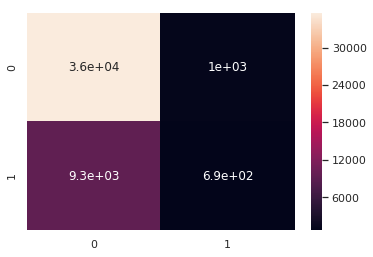

In [437]:
# LGBoost

from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

class_lgb = LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
class_lgb.fit(x_train, y_train)
y_pred = class_lgb.predict(x_val)

print("Training Accuracy: ", class_lgb.score(x_train, y_train))
print('Testing Accuarcy: ', class_lgb.score(x_val, y_val))

#classification report
cr = classification_report(y_val,  y_pred)
print(cr)

#confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot = True)

In [438]:
# avg precision score
from sklearn.metrics import average_precision_score

avg_prediction_lg = average_precision_score(y_val, y_pred)
print('Average Precision Score LGBOOST:', avg_prediction_lg)

Average Precision Score LGBOOST: 0.2272851868338372


In [439]:
y_pred_lg = classifier.predict(x_test)
submission = pd.DataFrame({'UniqueID': u_id,'loan_default': y_pred_lg})
filename = 'submission_lgu.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission_lgu.csv
